課題内容
1. 自分が取り組む通し課題を1つ選択する
    * Kaggleアカウントを作成し、該当課題のデータをダウンロードする
2. 目的変数と説明変数の関係を確認するためのグラフを作成する（ここからはNotebook上の作業です）
3. 目的変数を説明するのに有効そうな説明変数を見つける
4. DAY1で学んだアルゴリズムを利用する
    * 回帰の場合は線形回帰、分類の場合はロジスティック回帰
    * 質的変数が扱えないアルゴリズムを使う場合は、ダミー変数に置き換える
5. 予測精度または識別精度を確認する
    * 回帰問題の場合は、MSE、RMSE、MAEを求める
    * 分類問題の場合は、混同行列を作成し、Accuracy、Recall、Precisionを求める
6. できたところまでをNotebookでまとめ、GithubまたはGistで公開する
    * 公開方法がわからない方は、ipynbファイルを所属チャンネルに貼る

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score

In [42]:
def output_prediction(data, target):
    clf = linear_model.LinearRegression()
    clf.fit(data, target)
    predicted_target = clf.predict(data)
    
    accuracy = calculate_accuracy(data, target)
    
    print(accuracy)

    target_predict = clf.predict(data)
    
    plt.scatter(target, target, label="answer", s=3)
    plt.scatter(target, predicted_target, label="predict", s=3)
    plt.xlabel("target")
    plt.ylabel("predicted_target")
    plt.legend()
    plt.show()

In [43]:
def calculate_accuracy(data, target):
    clf = linear_model.LinearRegression()
    clf.fit(data, target)
    predicted_target = clf.predict(data)
    # 平均二乗誤差 (MSE)
    mse = metrics.mean_squared_error(target, predicted_target)
    # 二乗平均平方根誤差 (RMSE)
    rmse = np.sqrt(metrics.mean_squared_error(target, predicted_target))
    # 平均絶対誤差 (MAE)
    mae = metrics.mean_absolute_error(target, predicted_target)
    
    r2 = r2_score(target, predicted_target)
    
    return {"MSE":mse, "RMSE":rmse, "MAE":mae, "R2":r2}
    

In [44]:
df = pd.read_csv("./data/measurements.csv", decimal=',')

In [45]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [46]:
# 散布図行列
# sns.pairplot(df)

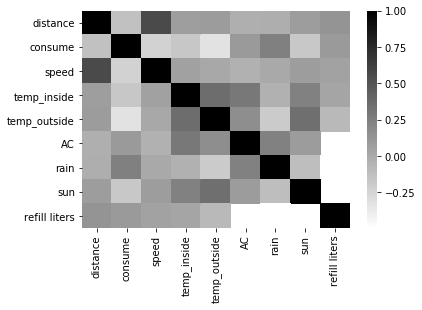

In [47]:
# 相関行列
sns.heatmap(pd.DataFrame.corr(df), cmap='binary')

In [48]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [49]:
df['gas_type'] = pd.get_dummies(df['gas_type'])
df['specials'] = pd.get_dummies(df['specials'])
df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].mean())
target = df['consume']
data = df.loc[:, ['distance', "speed", 'temp_inside' , 'temp_outside', 'gas_type', 'specials','AC', 'rain', 'sun']]

{'MSE': 0.8430357587862986, 'RMSE': 0.9181697875590867, 'MAE': 0.6194023955754976, 'R2': 0.2081883693326223}


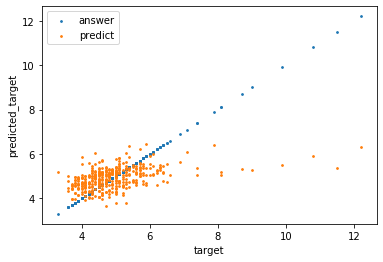

In [50]:
output_prediction(data, target)

{'MSE': 0.8430357587862986, 'RMSE': 0.9181697875590867, 'MAE': 0.6194023955754976, 'R2': 0.2081883693326223}


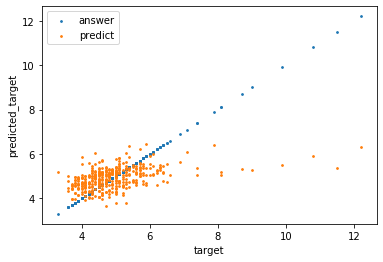

In [51]:
# 標準化

std_data = (data - data.mean()) / data.std()

output_prediction(std_data, target)


{'MSE': 0.8430357587862986, 'RMSE': 0.9181697875590867, 'MAE': 0.6194023955754977, 'R2': 0.2081883693326223}


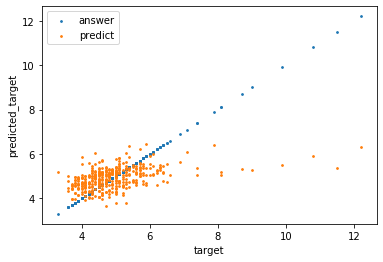

In [52]:
# 0~1に正規化
normalized_data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))


output_prediction(normalized_data, target)


In [53]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,0,1,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,0,1,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,0,1,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,0,1,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,0,1,0,0,0,NaN,NaN


In [54]:
df[df['consume'] > 7]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
37,4.9,7.4,26,21.5,6,0,1,0,0,0,NaN,NaN
45,2.0,9.9,21,21.5,4,0,0,0,0,0,NaN,NaN
60,2.9,7.9,18,21.5,9,0,0,1,1,0,NaN,NaN
61,2.1,12.2,23,21.5,9,0,0,1,1,0,NaN,NaN
112,5.1,8.7,21,23.5,5,0,0,0,0,0,NaN,NaN
147,1.7,10.8,14,21.5,10,0,1,0,1,0,NaN,NaN
160,5.1,8.1,39,21.5,4,0,1,0,0,0,NaN,NaN
181,12.3,7.1,52,22.5,0,0,1,1,1,0,NaN,NaN
198,2.9,7.4,24,21.5,14,0,0,0,0,0,NaN,NaN
206,2.4,9.0,26,20.0,10,0,0,0,0,0,NaN,NaN


{'MSE': 0.032538241423537693, 'RMSE': 0.18038359521735256, 'MAE': 0.14407119430770926, 'R2': 0.22276379033538607}


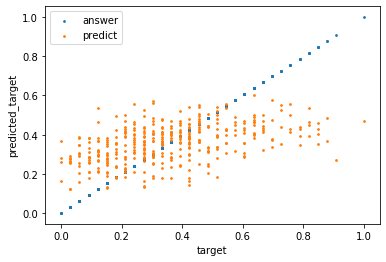

In [55]:
# consumeが7以下で最小値を取り除いたものでやってみる
df_2 = df[(df['consume'] < 7) & (df['consume'] != df['consume'].min())]

target = df_2['consume']
data = df_2.loc[:, ['distance', "speed", 'temp_inside', 'temp_outside', 'gas_type', 'specials', 'AC', 'rain', 'sun']]

# 0~1で正規化
normalized_data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
normalized_target = target.apply(lambda x: (x-np.min(target)) / (np.max(target)-np.min(target)))

output_prediction(normalized_data, normalized_target)
